# TABLE OF CONTENTS
1.	OVERVIEW
2.	DATA GATHERING
3.	DATA ASSESMENT
4.	DATA CLEANING
5.	DATA PREPOCESSING
6.	SENTIMENT ANALYSIS
7.	DATA  VISUALIZTIONS
8.	WORDCLOUDS
9.  CONCLUSIONS


# 1. OVERVIEW

This project is about sentiment analysis of twitter data. August 21 2022 the long awaited prequel series to arguably one of the best TV series to ever exist Game of Thrones dropped to much anticipation and hype, being abig G.O.T fan myself I decoded to do a little analysis on the tweets about the series to guage the reception of fans to the first episode.  I decided to gather tweets that had the word "Houseofthedragon" or "houseofthedragon" in them using snscrape library. I gathered over 50K tweets over a period of 3 days August 21 to 23.

Importing Libraries

Here I'll be importing all libraries needed. 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import re


from nltk.corpus import stopwords # to get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk.corpus import words # Get all words in english language

import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud
from emot.emo_unicode import UNICODE_EMOJI # For emojis

In [9]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\gbolahan\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [10]:
pip install wordcloud

You should consider upgrading via the 'c:\users\gbolahan\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


In [12]:
pip install emot

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\gbolahan\appdata\local\programs\python\python38-32\python.exe -m pip install --upgrade pip' command.


# 2.	DATA GATHERING

The code for web scraping using snscape is hosted in another workbook. Here the data is read into the dataframe "got_tweets"

In [18]:
# Reading in the data into a dataframe
got_tweets = pd.read_csv(r'C:\Users\Gbolahan\Desktop\August\got_tweets.csv')

In [19]:
# viewing the data shape
got_tweets.shape

(50252, 8)

In [4]:
got_tweets.head()

,Unnamed: 0,date,id,username,retweet,likes,followers,tweet
0,0,2022-08-23 23:56:22+00:00,1562227277835821063,DR0SH4,0,6,217,game of thrones disappointed me soooo bad like...
1,1,2022-08-23 23:53:40+00:00,1562226599256367104,JenniFink_,0,0,957,Watching house of dragons without ever seeing ...
2,2,2022-08-23 23:53:04+00:00,1562226446650773504,plzsaytheJ,0,0,24,House of Dragon is hard. Kinda wanna rewatch t...
3,3,2022-08-23 23:51:53+00:00,1562226150738460672,tobemcguire,0,0,299,House of Dragon first episode is already brewi...
4,4,2022-08-23 23:51:47+00:00,1562226123534123008,pollypocket_123,0,2,150,It’s only right to rewatch Game of Thrones now...


In [16]:
got_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50252 entries, 0 to 50251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       50252 non-null  object
 1   id         50252 non-null  int64 
 2   username   50252 non-null  object
 3   retweet    50252 non-null  int64 
 4   likes      50252 non-null  int64 
 5   followers  50252 non-null  int64 
 6   tweet      50252 non-null  object
dtypes: int64(4), object(3)
memory usage: 2.1+ MB


In [20]:
# i am dropping the 'Unnamed: 0' column before i do further aanalysis as it is an unnecesary column
got_tweets.drop('Unnamed: 0', axis=1, inplace=True)

# 3. DATA ASSESMENT

Checking the dataset before I dive in for data cleaning

In [13]:
got_tweets.head()

,date,id,username,retweet,likes,followers,tweet
0,2022-08-23 23:58:12+00:00,1562227738244702208,oooofatimaoooo,0,1,765,That first episode was beautiful #HouseoftheDr...
1,2022-08-23 23:58:00+00:00,1562227689666162691,MatthiasSuuck,0,5,1924,I’m shocked by #HouseoftheDragon episode 1. It...
2,2022-08-23 23:57:17+00:00,1562227507247693824,samkohko,0,0,81,#HouseoftheDragon was great
3,2022-08-23 23:56:01+00:00,1562227190204342272,modytalkmovies,0,2,3000,#HouseoftheDragon Episode 1 was genuinely so g...
4,2022-08-23 23:54:05+00:00,1562226702033592320,directedbyrian,0,4,8227,It’s very important information to know that t...


In [8]:
got_tweets.tail()


,date,id,username,retweet,likes,followers,tweet
32743,2022-08-23 00:00:13+00:00,1561865860033269761,dayclflins,0,0,150,Parei House of the dragon pra isso 🤡
32744,2022-08-23 00:00:10+00:00,1561865848352112640,Sharpieee22,0,2,1456,Just finished the first episode of House of th...
32745,2022-08-23 00:00:08+00:00,1561865837472104448,TheJadedJames,0,0,73,House of the Dragon was ... okay. The appeal o...
32746,2022-08-23 00:00:04+00:00,1561865821986635776,JasonJCarr,0,0,357,Wasn’t too keen on seeing the pilot of House o...
32747,2022-08-23 00:00:03+00:00,1561865815904993280,sammiiesofa,0,1,73,I'm here for house of the dragon. Despite the ...


In [14]:
got_tweets.sample(5)

,date,id,username,retweet,likes,followers,tweet
12301,2022-08-22 12:34:11+00:00,1561693213643120643,RachelVeres,0,2,747,Watched #HouseoftheDragon last night. Meh. Ha...
22267,2022-08-22 02:31:49+00:00,1561541621291765760,ProfessorF,1,5,14126,My one-line review of #HouseoftheDragon #House...
17186,2022-08-22 04:31:03+00:00,1561571629863383040,friezsnake,0,0,681,Viserys just ok the death of his wife. #House...
5243,2022-08-22 23:57:28+00:00,1561865167591182342,theJyneeB,0,1,325,#HouseoftheDragon It was really great! Can't w...
15536,2022-08-22 06:09:07+00:00,1561596307059376129,5CenturyDigital,0,0,645,I’m watching #HouseoftheDragon delighted to se...


In [17]:
# checking for duplicates
got_tweets.duplicated(subset='id').sum()


0

In [18]:
# checking for nulls
got_tweets.isnull().sum()

date         0
id           0
username     0
retweet      0
likes        0
followers    0
tweet        0
dtype: int64

In [20]:
# checking the datatypes
got_tweets.dtypes

date         object
id            int64
username     object
retweet       int64
likes         int64
followers     int64
tweet        object
dtype: object

In [21]:
got_tweets.describe()

,id,retweet,likes,followers
count,5.025200e+04,50252.000000,50252.000000,5.025200e+04
mean,1.561612e+18,0.268427,2.845439,5.745849e+03
std,1.818067e+14,4.073073,40.492558,8.217280e+04
min,1.561141e+18,0.000000,0.000000,0.000000e+00
25%,1.561523e+18,0.000000,0.000000,1.520000e+02
50%,1.561537e+18,0.000000,0.000000,4.660000e+02
75%,1.561683e+18,0.000000,1.000000,1.296250e+03
max,1.562228e+18,528.000000,3456.000000,1.199858e+07


## 4. DATA CLEANING

In [26]:
got_tweets1 = got_tweets.copy()

In [21]:
# converting the date column to datetime
got_tweets['date'] = got_tweets['date'].apply(pd.to_datetime)

In [22]:
# converting the 'id' column to string
got_tweets['id'] = got_tweets['id'].astype(str)

# 5. DATA PREPROCESSING

Data preprocessing involves transforming the data so it will be ready for further analysis. I created some functions which I applied to 'tweet' column in my dataframe to produce desired results. 

The hashtags are extracted from the tweets using the regex library.
the Hashtags gotten are saved in a column ‘hashtags’ in our data-frame. 

In [23]:
def find_hashtags(tweet):
    #This function extracts hashtags from the tweets.
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)
  
got_tweets['hashtags'] = got_tweets.tweet.apply(find_hashtags)

These hashtags are then converted and stored into a list. The list created is a list of lists because some tweets have more than one hashtags associated with them. This list is flattened and converted into a data frame. This dataframe will be saved and used in later visualizations

In [24]:
hashtag_list = got_tweets['hashtags'].to_list()
flat_hashtags_df = pd.DataFrame([item for sublist in hashtag_list for item in sublist])
flat_hashtags_df.shape
#change the name of the column to hashtags
flat_hashtags_df.columns = ['hashtags']
flat_hashtags_df.head()

,hashtags
0,#HouseoftheDragon
1,#HouseoftheDragon
2,#HouseOfTheDragonHBO
3,#HouseoftheDragon
4,#HouseoftheDragon


In [44]:
got_tweets.head()

,date,id,username,retweet,likes,followers,tweet,hashtags
0,2022-08-23 23:58:12+00:00,1562227738244702208,oooofatimaoooo,0,1,765,That first episode was beautiful #HouseoftheDr...,[#HouseoftheDragon]
1,2022-08-23 23:58:00+00:00,1562227689666162691,MatthiasSuuck,0,5,1924,I’m shocked by #HouseoftheDragon episode 1. It...,"[#HouseoftheDragon, #HouseOfTheDragonHBO]"
2,2022-08-23 23:57:17+00:00,1562227507247693824,samkohko,0,0,81,#HouseoftheDragon was great,[#HouseoftheDragon]
3,2022-08-23 23:56:01+00:00,1562227190204342272,modytalkmovies,0,2,3000,#HouseoftheDragon Episode 1 was genuinely so g...,[#HouseoftheDragon]
4,2022-08-23 23:54:05+00:00,1562226702033592320,directedbyrian,0,4,8227,It’s very important information to know that t...,[#HouseOfTheDragon]


Here we see how many total hashtags there are in the dataset and how many of them are unique.

In [49]:
print("Total hashtags: ", len(flat_hashtags_df['hashtags']))
print("Repeated hashtags: ", len(flat_hashtags_df['hashtags'].unique()))

Total hashtags:  69465
Repeated hashtags:  3042


This means that out of the total 69465 hashtags retrieved from the dataset, only 3042b are unique.

We can plot the top 20 hastags using Matplotlib with the code below

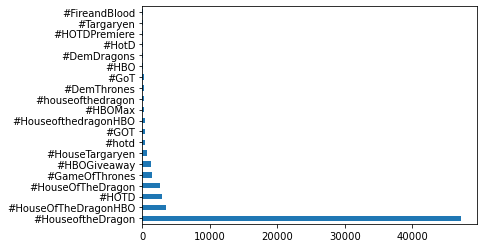

In [50]:
flat_hashtags_df['hashtags'].value_counts()[:20].plot(kind='barh')

The text colummn is the focus of our sentiment analysis beacusse thats where our textual data is stored.
we have to clean up the text if we are to make sense of the data and perform further analysis.
Twitter data usually contains a lot of noise so multiple cleaning tasks must be carried out for further data processing. As shown below, we eliminate URLs, hashtags, and mentions from tweets using regular expressions in Python.


For the cleaning of tweets, we define the function cleaner. This function removes URLs, punctuation marks, #, and @ from a text (in this case a tweet).

In [145]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
#     tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
#          if w.lower() in words or not w.isalpha())
    return tweet
    

got_tweets['cleaned_tweet'] = got_tweets['cleaned_tweet'].apply(cleaner)

In [26]:
got_tweets.head()

,date,id,username,retweet,likes,followers,tweet,hashtags,cleaned_tweet
0,2022-08-23 23:58:12+00:00,1562227738244702208,oooofatimaoooo,0,1,765,That first episode was beautiful #HouseoftheDr...,[#HouseoftheDragon],That first episode was beautiful HouseoftheDragon
1,2022-08-23 23:58:00+00:00,1562227689666162691,MatthiasSuuck,0,5,1924,I’m shocked by #HouseoftheDragon episode 1. It...,"[#HouseoftheDragon, #HouseOfTheDragonHBO]",I’m shocked by HouseoftheDragon episode 1. It ...
2,2022-08-23 23:57:17+00:00,1562227507247693824,samkohko,0,0,81,#HouseoftheDragon was great,[#HouseoftheDragon],HouseoftheDragon was great
3,2022-08-23 23:56:01+00:00,1562227190204342272,modytalkmovies,0,2,3000,#HouseoftheDragon Episode 1 was genuinely so g...,[#HouseoftheDragon],HouseoftheDragon Episode 1 was genuinely so go...
4,2022-08-23 23:54:05+00:00,1562226702033592320,directedbyrian,0,4,8227,It’s very important information to know that t...,[#HouseOfTheDragon],It’s very important information to know that t...


In [ ]:
#calculating average tweet length and word count
import numpy as np
tweets_df['text_len'] = tweets_df['Text'].astype(str).apply(len)
tweets_df['text_word_count'] = tweets_df['Text'].apply(lambda x: len(str(x).split()))
print("Average length of tweets ", round(np.mean(tweets_df['text_len'])))
print("Average word counts of tweets", round(np.mean(tweets_df['text_word_count'])))


# 6. SENTIMENT ANALYSIS

Sentiment Analysis is the method to measure attitude and emotions of a speaker/writer based on computational treatment of text data.
I will be employing the use of Vader library for sentiment analysis

In [27]:
# import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

This function analyzes the text and returns the score in the form of a dictionary with the following components :negative, neutral, positive and compound. Based on the scores assigned to each component, we can define the overall sentiment of the text to be positive, negative or neutral. This is done in the following code:

In [28]:

for index, row in got_tweets['tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    if score['neg'] > score['pos']:
        got_tweets.loc[index, "Sentiment"] = "negative"
    elif score['pos'] > score['neg']:
        got_tweets.loc[index, "Sentiment"] = "positive"
    else:
        got_tweets.loc[index, "Sentiment"] = "neutral"
        
    got_tweets.loc[index, 'neg'] = score['neg']
    got_tweets.loc[index, 'neu'] = score['neu']
    got_tweets.loc[index, 'pos'] = score['pos']
    got_tweets.loc[index, 'compound'] = score['compound']
    


In [29]:
got_tweets.head()

,date,id,username,retweet,likes,followers,tweet,hashtags,cleaned_tweet,Sentiment,neg,neu,pos,compound
0,2022-08-23 23:58:12+00:00,1562227738244702208,oooofatimaoooo,0,1,765,That first episode was beautiful #HouseoftheDr...,[#HouseoftheDragon],That first episode was beautiful HouseoftheDragon,positive,0.000,0.562,0.438,0.5994
1,2022-08-23 23:58:00+00:00,1562227689666162691,MatthiasSuuck,0,5,1924,I’m shocked by #HouseoftheDragon episode 1. It...,"[#HouseoftheDragon, #HouseOfTheDragonHBO]",I’m shocked by HouseoftheDragon episode 1. It ...,positive,0.112,0.732,0.156,0.2247
2,2022-08-23 23:57:17+00:00,1562227507247693824,samkohko,0,0,81,#HouseoftheDragon was great,[#HouseoftheDragon],HouseoftheDragon was great,positive,0.000,0.328,0.672,0.6249
3,2022-08-23 23:56:01+00:00,1562227190204342272,modytalkmovies,0,2,3000,#HouseoftheDragon Episode 1 was genuinely so g...,[#HouseoftheDragon],HouseoftheDragon Episode 1 was genuinely so go...,positive,0.000,0.693,0.307,0.9534
4,2022-08-23 23:54:05+00:00,1562226702033592320,directedbyrian,0,4,8227,It’s very important information to know that t...,[#HouseOfTheDragon],It’s very important information to know that t...,negative,0.183,0.676,0.141,-0.1548


Once the sentiments are identified, we can create 3 lists for different sentiments. We can then calculate the overall percentage of each sentiment in the dataset.

In [30]:
#create new data frames for all sentiments
tweet_neg = got_tweets[got_tweets["Sentiment"] == "negative"]
tweet_neu = got_tweets[got_tweets["Sentiment"] == "neutral"]
tweet_pos = got_tweets[got_tweets["Sentiment"] == "positive"]
#function for calculating the percentage of all the sentiments
def calc_percentage(x,y):
    return x/y * 100
pos_per = calc_percentage(len(tweet_pos), len(got_tweets))
neg_per = calc_percentage(len(tweet_neg), len(got_tweets))
neu_per = calc_percentage(len(tweet_neu), len(got_tweets))
print("positive: {} {}%".format(len(tweet_pos),  format(pos_per, '.1f')))
print("negative: {} {}%".format(len(tweet_neg), format(neg_per, '.1f')))
print("neutral: {} {}%".format(len(tweet_neu), format(neu_per, '.1f'))), format(calc_percentage(len(tweet_neu), len(got_tweets)), '.1f')

positive: 19928 39.7%
negative: 12144 24.2%
neutral: 18180 36.2%


(None, '36.2')

# 7.	DATA  VISUALIZTIONS

The sentiment count can now be visualized below

<BarContainer object of 3 artists>

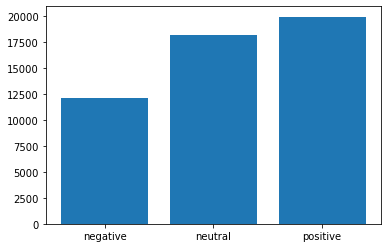

In [76]:
#create a bar graph by sentiment
# import matplotlib.pyplot as plt
labels = got_tweets.groupby('Sentiment').count().index.values
values = got_tweets.groupby('Sentiment').size().values
plt.bar(labels, values)


In [39]:
data = got_tweets['Sentiment'].value_counts()
data.head()

positive    19928
neutral     18180
negative    12144
Name: Sentiment, dtype: int64

A pie chart represention shows the 3 sentiments present in the data. This is done below

(-1.1186827750829258,
 1.1099133755834791,
 -1.1128318115826703,
 1.1006110386467938)

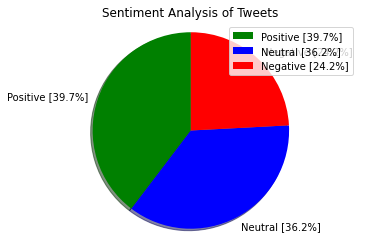

In [79]:
labels = ['Positive ['+format(pos_per, '.1f')+'%]', 'Neutral ['+format(neu_per,'.1f')+'%]', 'Negative ['+format(neg_per,'.1f')+'%]']
sizes = [len(tweet_pos), len(tweet_neu), len(tweet_neg)]
colors = ['green', 'blue', 'red']
patches, texts = plt.pie(sizes, labels = labels, colors = colors,shadow = True, startangle = 90)
plt.legend(labels)
plt.title("Sentiment Analysis of Tweets")
plt.axis('equal')

In [ ]:
39.7% of all tweets were positive
36.2% were neutral 
24.2% were negative

# 8. WORDCLOUD

Now a worcloud using the tweets, two wordcloouds will be crested one for the positive tweets and another for the negative ones so we can see the words most used in these tweets. To create a worcloud, firstly let’s define a function below, so you can use wordcloud again for all tweets, positive tweets, negative tweets etc.

WORDCLOUD FOR POSITIVE TWEETS

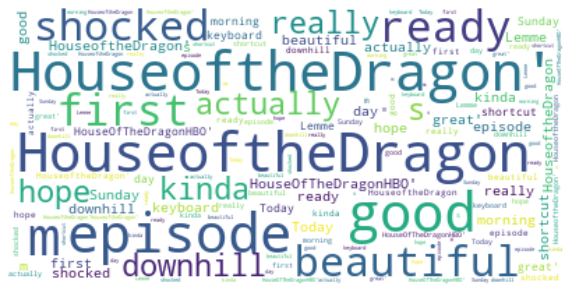

In [157]:
from wordcloud import WordCloud, STOPWORDS
#function to create word cloud
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color = "white", max_words = 3000, stopwords = stopwords, repeat = True)
    wc.generate(str(text))
    plt.figure(figsize=[10,8])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
#word cloud for positive sentiments
create_wordcloud(tweet_pos["cleaned_tweet"].values)


WORDLOUD FOR NEGATIVE TWEETS

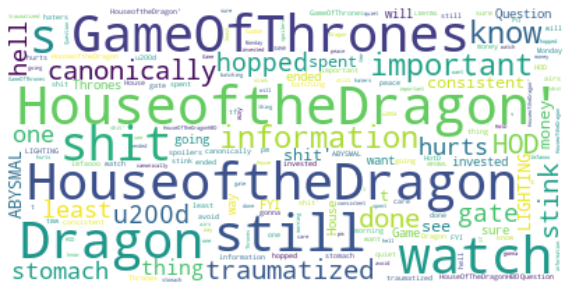

In [149]:
# wordcloud for negative tweets
create_wordcloud(tweet_neg["cleaned_tweet"].values)

Saving the final data so it be visualized in tableau

In [156]:
got_tweets.to_csv(r"C:\Users\Gbolahan\Desktop\August\got_tweets_final.csv", index = True)
flat_hashtags_df.to_csv(r"C:\Users\Gbolahan\Desktop\August\hashtags.csv", index = True)

# 9.  CONCLUSIONS

House of dragon recieved a 8.8/10 rating on IMDB in comparison its predecessor Game of Thrones which recieved a 8.9/10 rating on IMDB so we can ay House of the Dragon is off to a good start. I will be doing further analysis once the entire season is concluded in order to see how it is recieved. At 39.7% positive sentiment is quite small with alot of fans being neutral 36.2, but negative sentiment is in the minority with 24.2%.